In [5]:
# Call Packages & Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [2]:
# minus font
mpl.rcParams['axes.unicode_minus'] = False

# customize matplotlib
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['font.size'] = 15

In [3]:
resource_path = os.getcwd() + '/resource/'
resource_path

'E:\\(4-2)PatternRecognition\\Python/resource/'

In [5]:
resource_path = os.getcwd() + '/resource/'
data = pd.read_csv(resource_path + 'dda_bicycle.csv')
data

,ST_ID,주중_사용량,주말_사용량,주중_이용량,주말_이용량,주중_오전_사용량,주중_오후_사용량,주중_저녁_사용량,주말_오전_사용량,주말_오후_사용량,...,주말_출근_사용량,주말_퇴근_사용량,주중_심야_이용량,주중_없음_이용량,주중_출근_이용량,주중_퇴근_이용량,주말_심야_이용량,주말_없음_이용량,주말_출근_이용량,주말_퇴근_이용량
0,113,260.720000,216.500000,26.076919,33.039416,5.278058,17.154837,17.044183,4.399544,15.886044,...,3.541106,20.236150,23.846610,26.817154,16.469736,27.601494,27.425284,31.476338,30.692134,37.557687
1,152,194.782857,276.078947,39.932306,45.007839,4.121622,9.055024,19.046355,4.647180,18.316567,...,4.095365,28.192157,37.953195,39.820727,30.217587,46.612399,39.055105,45.469159,44.575398,51.268011
2,207,357.502857,486.552632,43.937444,56.251412,6.813993,20.440501,30.487834,7.430107,36.927251,...,5.572193,56.361854,45.972040,46.809027,23.782021,51.673130,49.184736,57.369447,46.345871,60.446042
3,502,372.188571,515.736842,37.393704,45.257624,6.081194,19.002106,36.454097,7.381105,36.215553,...,5.938175,56.147074,36.451015,40.730705,23.296345,43.962262,38.526832,44.644219,42.742175,49.861064
4,1210,258.982857,255.394737,25.952713,32.603713,4.376590,21.215353,13.931013,3.072576,24.705123,...,3.641590,27.480159,22.800377,26.122295,14.718643,28.959735,25.391726,30.023471,29.979802,35.411884
5,1308,199.971429,168.736842,18.923383,20.770927,4.874444,12.016864,13.102250,4.407521,9.144514,...,2.718513,12.678711,17.183712,19.125492,15.919771,20.835573,20.446830,19.571124,16.455340,22.690883
6,2102,262.022857,277.405405,27.932759,34.287063,6.243388,11.017001,24.104517,6.552531,14.812745,...,3.895828,22.352428,26.046029,27.238843,23.374277,31.361059,28.315445,32.317734,32.896578,40.794934
7,2219,240.965714,319.421053,46.703666,52.272153,3.540774,14.911488,21.416044,4.550543,24.183206,...,3.550498,34.678182,38.448637,44.649325,36.421575,56.899170,41.326884,50.103505,58.193294,61.195447
8,2701,223.725714,141.815789,14.196083,20.855904,6.961437,13.327114,11.635290,2.702914,10.816620,...,3.266089,14.164983,13.563684,15.756310,9.993279,15.916448,14.293079,20.483405,15.486620,22.366855
9,3533,227.520000,244.526316,24.533478,30.379352,4.476913,14.011389,17.204440,4.038228,17.280165,...,2.719655,24.876906,23.199106,23.491438,15.434407,28.059945,25.185712,27.935555,20.366497,36.394699


In [7]:
print(data.columns, len(data.columns), sep = '\n')

Index(['ST_ID', '주중_사용량', '주말_사용량', '주중_이용량', '주말_이용량', '주중_오전_사용량',
       '주중_오후_사용량', '주중_저녁_사용량', '주말_오전_사용량', '주말_오후_사용량', '주말_저녁_사용량',
       '주중_오전_이용량', '주중_오후_이용량', '주중_저녁_이용량', '주말_오전_이용량', '주말_오후_이용량',
       '주말_저녁_이용량', '주중_심야_사용량', '주중_없음_사용량', '주중_출근_사용량', '주중_퇴근_사용량',
       '주말_심야_사용량', '주말_없음_사용량', '주말_출근_사용량', '주말_퇴근_사용량', '주중_심야_이용량',
       '주중_없음_이용량', '주중_출근_이용량', '주중_퇴근_이용량', '주말_심야_이용량', '주말_없음_이용량',
       '주말_출근_이용량', '주말_퇴근_이용량'],
      dtype='object')
33


In [12]:
scaler = MinMaxScaler()
data_scale = pd.DataFrame(scaler.fit_transform(data), columns = data.columns, index = data.index)
data_scale

,ST_ID,주중_사용량,주말_사용량,주중_이용량,주말_이용량,주중_오전_사용량,주중_오후_사용량,주중_저녁_사용량,주말_오전_사용량,주말_오후_사용량,...,주말_출근_사용량,주말_퇴근_사용량,주중_심야_이용량,주중_없음_이용량,주중_출근_이용량,주중_퇴근_이용량,주말_심야_이용량,주말_없음_이용량,주말_출근_이용량,주말_퇴근_이용량
0,0.000000,0.371674,0.199733,0.365479,0.345781,0.507879,0.666085,0.217935,0.358908,0.242652,...,0.255490,0.173006,0.317292,0.356196,0.245058,0.285121,0.376371,0.314967,0.356045,0.391228
1,0.011404,0.000000,0.359068,0.791699,0.683105,0.169806,0.000000,0.298607,0.411294,0.330135,...,0.427639,0.355136,0.752569,0.774954,0.765252,0.748997,0.709683,0.685164,0.681130,0.744327
2,0.027485,0.917220,0.921951,0.914905,1.000000,0.956896,0.936280,0.759607,1.000000,1.000000,...,0.886329,1.000000,1.000000,1.000000,0.521742,0.872482,1.000000,1.000000,0.722586,0.980700
3,0.113743,1.000000,1.000000,0.713606,0.690146,0.742669,0.817994,1.000000,0.989634,0.974383,...,1.000000,0.995083,0.706217,0.804258,0.503365,0.684333,0.694543,0.663339,0.638204,0.708092
4,0.320760,0.361882,0.303751,0.361658,0.333501,0.244343,1.000000,0.092499,0.078199,0.560082,...,0.286700,0.338837,0.285010,0.333819,0.178799,0.318263,0.318089,0.276529,0.339366,0.335965
5,0.349415,0.029247,0.071997,0.145421,0.000000,0.389886,0.243566,0.059107,0.360596,0.000000,...,0.000000,0.000000,0.111700,0.108499,0.224248,0.120029,0.176367,0.000000,0.022683,0.008345
6,0.581579,0.379018,0.362616,0.422568,0.380946,0.790085,0.161342,0.502410,0.814356,0.204020,...,0.365664,0.221452,0.385158,0.369775,0.506313,0.376857,0.401883,0.337227,0.407664,0.474601
7,0.615789,0.260323,0.474981,1.000000,0.887847,0.000000,0.481604,0.394086,0.390851,0.541296,...,0.258407,0.503615,0.767856,0.930450,1.000000,1.000000,0.774793,0.807771,1.000000,1.000000
8,0.756725,0.163145,0.000000,0.000000,0.002395,1.000000,0.351314,0.000000,0.000000,0.060185,...,0.170073,0.034024,0.000000,0.000000,0.000000,0.000000,0.000000,0.024135,0.000000,0.000000
9,1.000000,0.184533,0.274685,0.318000,0.270809,0.273672,0.407585,0.224392,0.282475,0.292831,...,0.000355,0.279243,0.297313,0.249097,0.205883,0.296308,0.312184,0.221291,0.114265,0.361276


In [13]:
pca = PCA(random_state = 1107)
X_p = pca.fit_transform(data_scale)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0    0.727690
1    0.872947
2    0.931981
3    0.959710
4    0.983479
5    0.992062
6    0.997881
7    0.999173
8    1.000000
9    1.000000
dtype: float64

In [14]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals = 2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

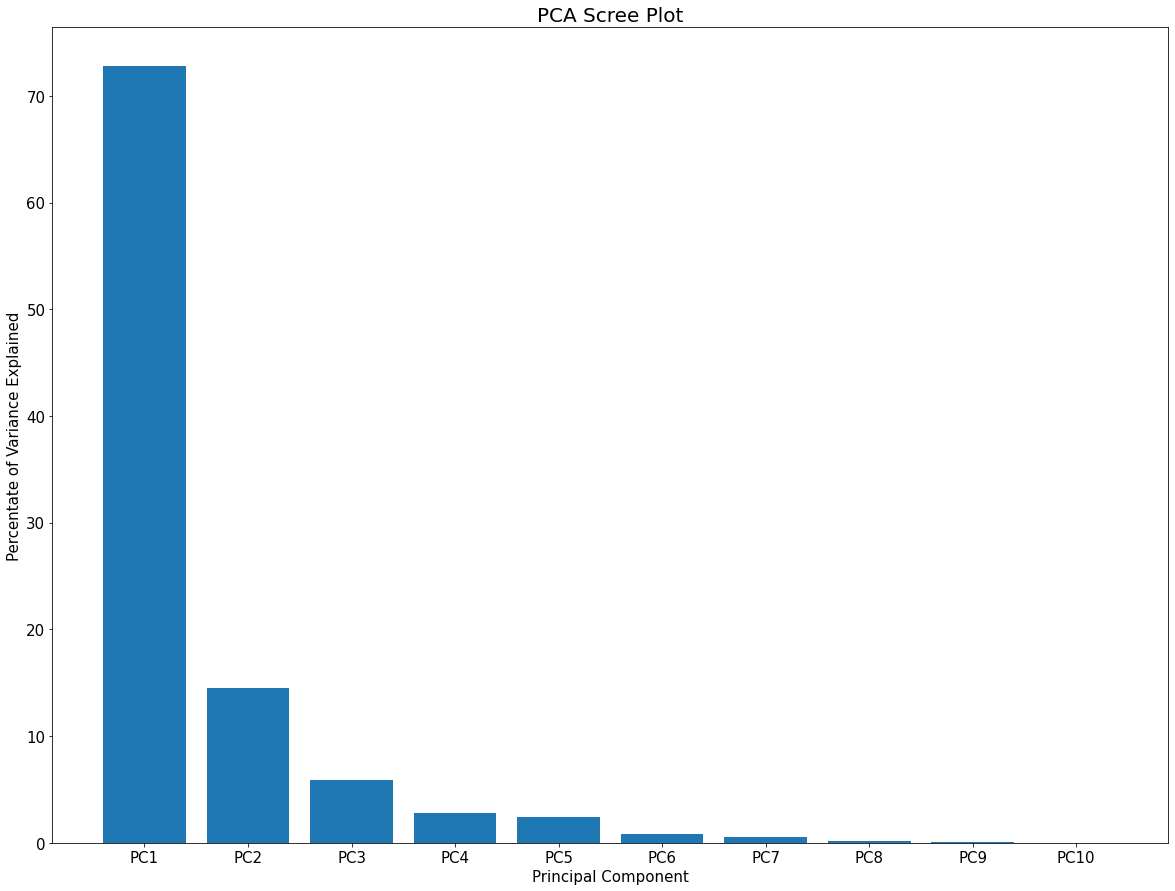

In [84]:
ax = plt.bar(x = range(len(percent_variance)), height = percent_variance, tick_label = columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [86]:
pca.explained_variance_ratio_

array([7.27689799e-01, 1.45257375e-01, 5.90334759e-02, 2.77292011e-02,
       2.37688144e-02, 8.58325317e-03, 5.81943925e-03, 1.29130150e-03,
       8.27340051e-04, 1.72464828e-32])

In [16]:
X_pp = pd.DataFrame(X_p[:, :3], columns = ['PC1', 'PC2', 'PC3'], index = data.index)
X_pp

,PC1,PC2,PC3
0,-0.669384,-0.136057,0.335457
1,0.659421,1.210710,-0.289072
2,2.655226,-0.613617,0.126558
3,2.075585,-1.052338,-0.260175
4,-0.722344,-0.243185,0.895854
5,-1.850708,0.090512,-0.419075
6,-0.202927,-0.086287,-0.785620
7,1.412478,1.257886,0.343702
8,-2.309445,-0.533919,0.078746
9,-1.047902,0.106296,-0.026375


In [42]:
print(X_pp["PC1"])
print(X_p[0])
print(X_p[1])
print(X_p[2])

0   -0.669384
1    0.659421
2    2.655226
3    2.075585
4   -0.722344
5   -1.850708
6   -0.202927
7    1.412478
8   -2.309445
9   -1.047902
Name: PC1, dtype: float64
[-6.69383943e-01 -1.36057238e-01  3.35456648e-01 -4.47117955e-01
 -9.95704923e-02  2.46766021e-01 -3.15257089e-02 -6.71823037e-02
 -8.84577004e-02  2.41734385e-16]
[ 6.59421458e-01  1.21070953e+00 -2.89071923e-01 -4.21297137e-01
  1.51828911e-01 -2.51709771e-01  2.86396127e-02 -6.28304743e-02
  1.90733477e-02  2.41734385e-16]
[ 2.65522553e+00 -6.13616942e-01  1.26557714e-01 -8.50946120e-02
  2.78609106e-01  9.54142037e-02  2.61872279e-01  4.06873930e-02
  1.54540732e-02  2.41734385e-16]


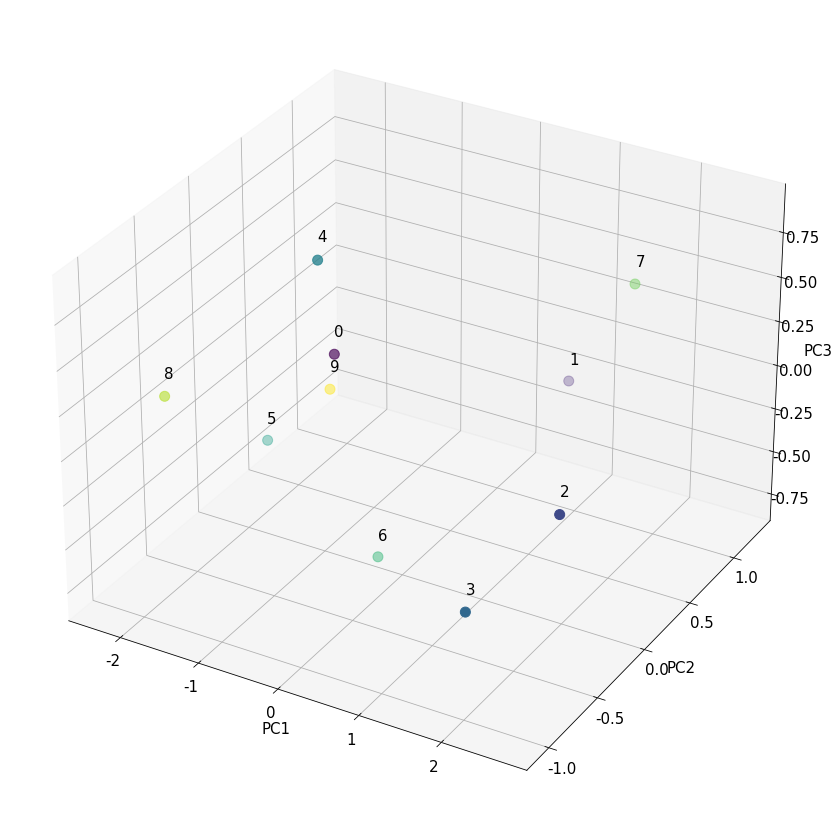

In [58]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
# ax.scatter(X_p[0], X_p[1], X_p[2], s = 100, c = data.index)
for i in data.index:
    # ax.scatter(X_p[i][0], X_p[i][1], X_p[i][2], s = 100, c = i)
    ax.text(X_p[i][0], X_p[i][1], X_p[i][2] + 0.1, i, size = 15)
    # ax.text(X_pp["PC1"][i], X_pp["PC2"][i], X_pp["PC3"][i], i, size = 15)
ax.scatter(X_pp["PC1"], X_pp["PC2"], X_pp["PC3"], s = 100, c = data.index)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

In [49]:
X_p[0][0]

-0.6693839430276702

In [50]:
X_p[0][1]

-0.13605723827561506

In [51]:
X_p[0][2]

0.33545664811371295

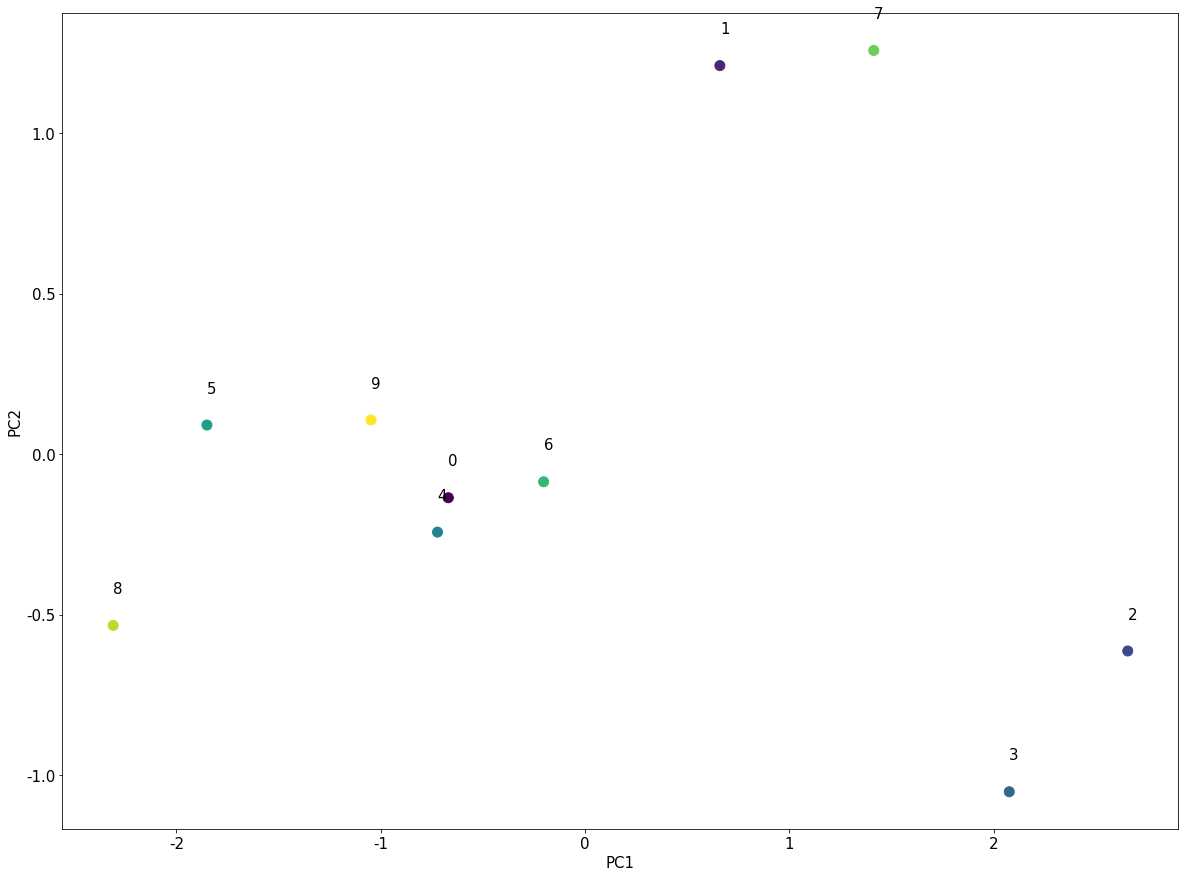

In [83]:
for i in data.index:
    plt.text(X_p[i][0], X_p[i][1] + 0.1, i, size = 15)
    # plt.text(X_p[0][i], X_p[1][i] + 0.1, i, size = 15)
plt.scatter(X_pp["PC1"], X_pp["PC2"], s = 100, c = data.index)
# plt.scatter(X_p[0], X_p[1], s = 100, c = data.index)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

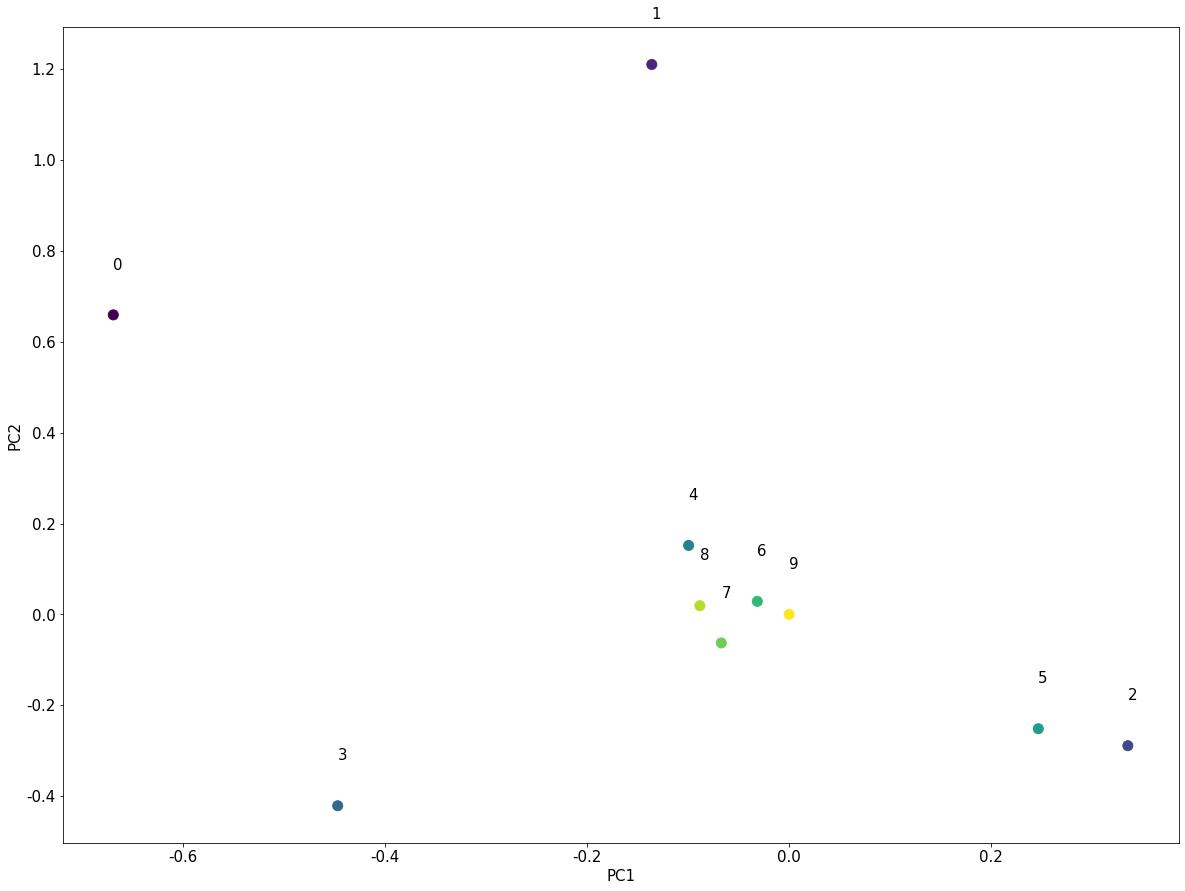

In [87]:
for i in data.index:
    # plt.text(X_p[i][0], X_p[i][1] + 0.1, i, size = 15)
    plt.text(X_p[0][i], X_p[1][i] + 0.1, i, size = 15)
# plt.scatter(X_pp["PC1"], X_pp["PC2"], s = 100, c = data.index)
plt.scatter(X_p[0], X_p[1], s = 100, c = data.index)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()